In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import scipy
import sklearn
from sklearn.svm import SVC
from scipy.stats import pearsonr
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier


# Classification

In [2]:
df = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df.head()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [3]:
df.info()
df.describe()
df['Diabetes_binary'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64

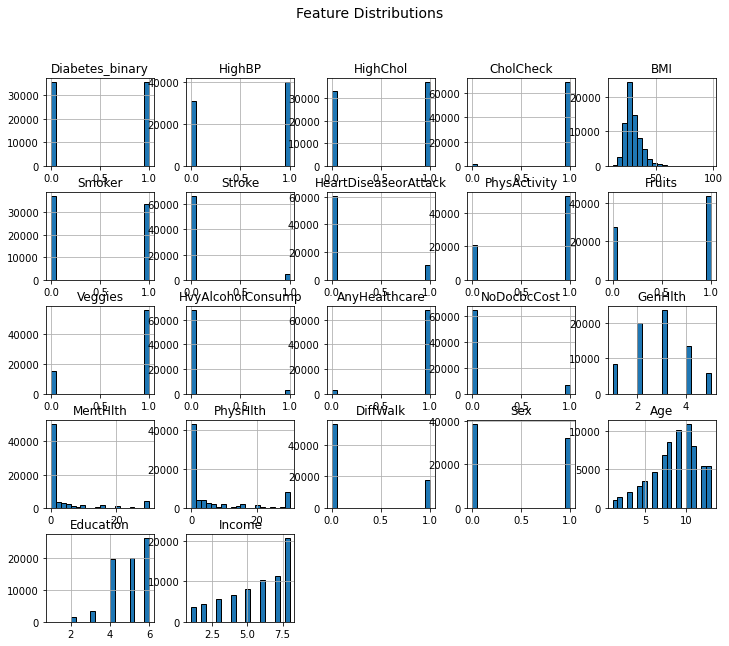

In [4]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols].hist(figsize=(12,10), bins=20, edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=14)
plt.show()


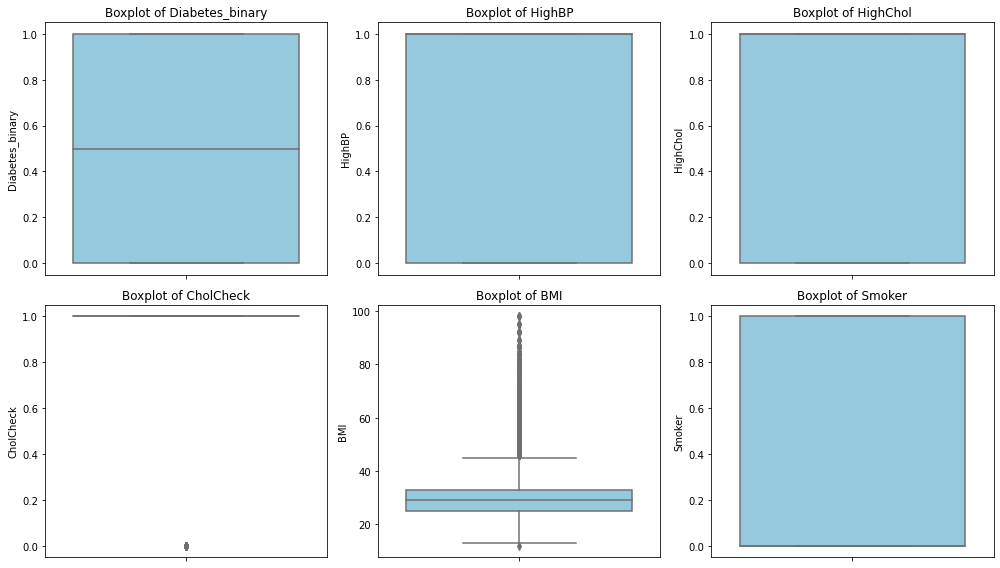

In [5]:
plt.figure(figsize=(14, 8))
for i, col in enumerate(numeric_cols[:6], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [6]:
X = df.drop("Diabetes_binary", axis=1)
y = df["Diabetes_binary"]

### Logistic Regression

In [7]:
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Pipeline = scaling + logistic regression
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(solver="lbfgs", max_iter=1000))
])

# K-fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipe, X, y, cv=cv, scoring="accuracy")

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy: %.3f ± %.3f" % (cv_scores.mean(), cv_scores.std()))

# Fit on train and test
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("Test Accuracy: %.3f" % accuracy_score(y_test, y_pred))


Cross-validation scores: [0.75040668 0.74906288 0.74593295 0.7451549  0.74932805]
Mean CV accuracy: 0.748 ± 0.002
Test Accuracy: 0.749


### Decision Tree

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

cv = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy: %.4f ± %.4f" % (cv_scores.mean(), cv_scores.std()))

Cross-validation scores: [0.64837341 0.65388967 0.65285047 0.6542651  0.66331872 0.66246994
 0.65285047 0.65836752 0.65666997 0.6520017 ]
Mean CV accuracy: 0.6555 ± 0.0045


In [10]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Test Accuracy: %.3f" % accuracy_score(y_test, y_pred))
print("\nClassification Report\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix\n", confusion_matrix(y_test, y_pred))

Test Accuracy: 0.651

Classification Report
               precision    recall  f1-score   support

         0.0       0.65      0.66      0.66      7070
         1.0       0.66      0.64      0.65      7069

    accuracy                           0.65     14139
   macro avg       0.65      0.65      0.65     14139
weighted avg       0.65      0.65      0.65     14139


Confusion Matrix
 [[4695 2375]
 [2555 4514]]


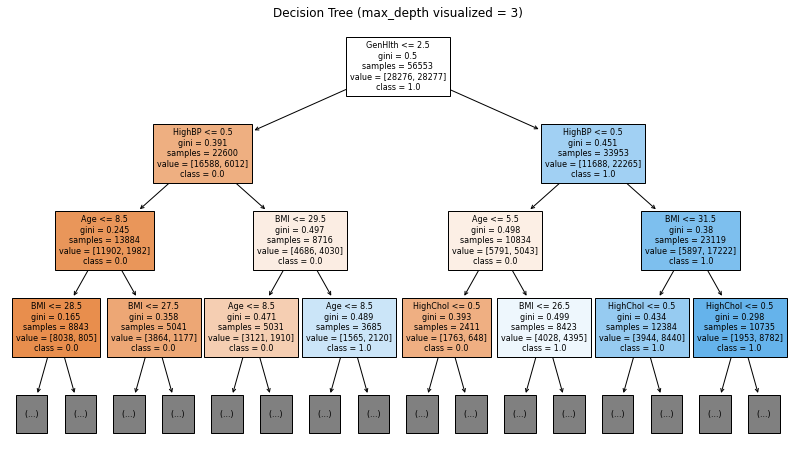

In [11]:
viz_depth = 3
plt.figure(figsize=(14, 8))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=[str(c) for c in sorted(y.unique())],
    max_depth=viz_depth,
    filled=True,
    fontsize=8
)
plt.title(f"Decision Tree (max_depth visualized = {viz_depth})")
plt.show()

### Support Vector Machine

In [12]:
# Split dataset into testing and training
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Run the model
Svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
Svm_model.fit(X_train_scaled, y_train)
y_pred = Svm_model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7494341757827235


In [13]:
# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(Svm_model, X, y, cv=kf, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean CV accuracy:", np.mean(scores))

Cross-validation scores: [0.74899215 0.74948723 0.74692319 0.7498939  0.7464988 ]
Mean CV accuracy: 0.7483590539060225


### Multi-Layer Perceptron Neural Network

In [14]:
# Stratified train-test split (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Build a pipeline
mlp_pipeline = make_pipeline(
    StandardScaler(),
    MLPClassifier(hidden_layer_sizes=(10,), activation='relu',
                  solver='adam', random_state=1, max_iter=300)
)

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(mlp_pipeline, X, y, cv=cv, scoring="accuracy")

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy: %.3f ± %.3f" % (cv_scores.mean(), cv_scores.std()))

# Fit and test accuracy
mlp_pipeline.fit(X_train, y_train)
y_pred = mlp_pipeline.predict(X_test)
print("Test Accuracy: %.3f" % accuracy_score(y_test, y_pred))


Cross-validation scores: [0.75344791 0.75465026 0.75180365 0.75116707 0.7548451 ]
Mean CV accuracy: 0.753 ± 0.001
Test Accuracy: 0.752


# Regression


In [15]:
data = pd.read_csv('winequality-red.csv', sep=';', index_col=False)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


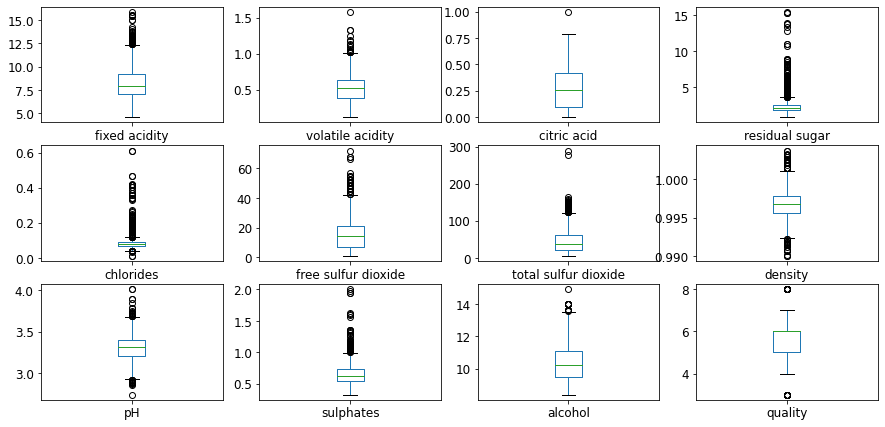

In [16]:
# Data preprocessing
# desribe the data
data.describe() # column with possible outliers - free sulphur dioxide, total sulfur dioxide, residual sugar,
# Use box plot to check the value range
data_mean = data.iloc[:, :]
data_mean.plot(kind='box', subplots=True, layout=(8,4), sharex=False,
sharey=False, fontsize=12, figsize=(15,20));

<AxesSubplot:>

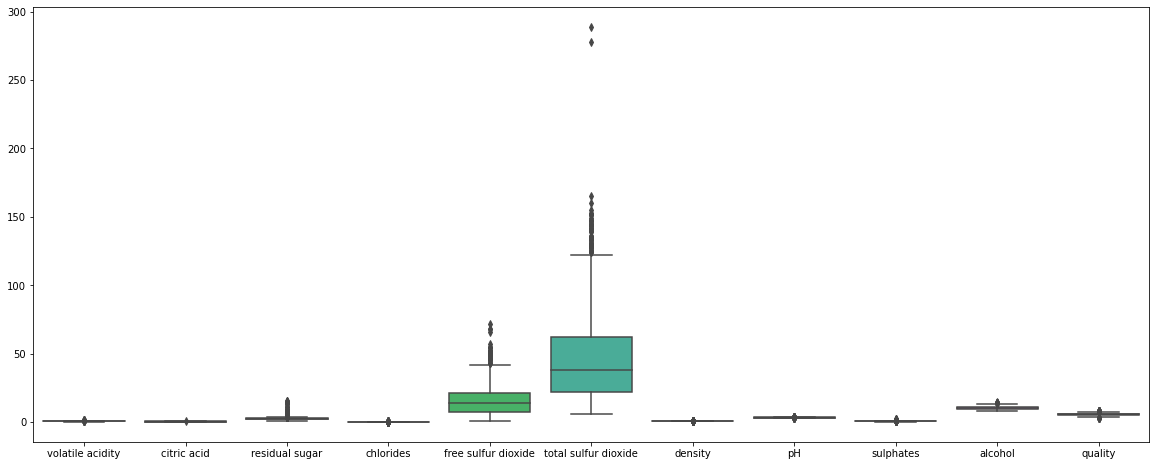

In [17]:
# Compare the features data ranges
fig,ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=data.iloc[:, 1:12],ax=ax)

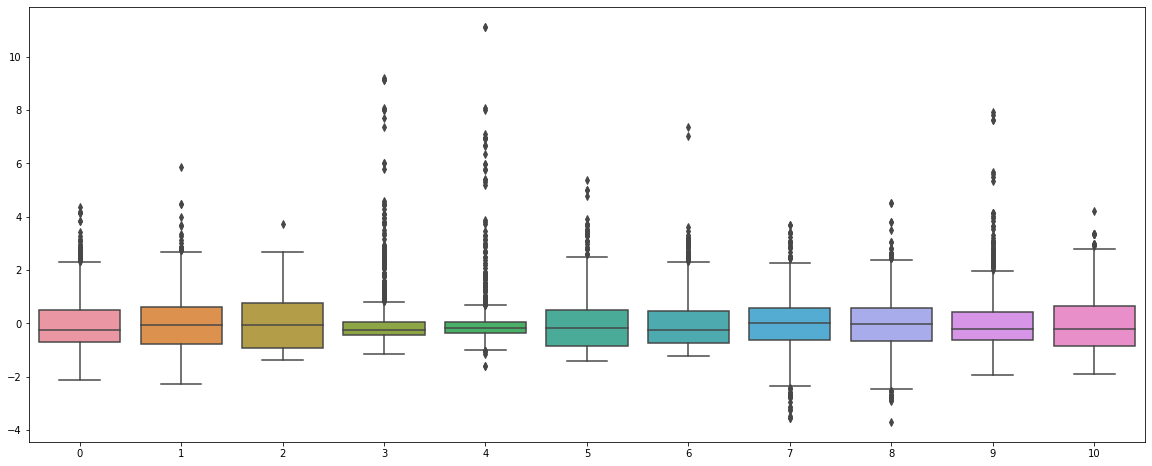

In [18]:
# Feature Normalisation
X = data.drop('quality', axis=1)
y = data['quality'].values.reshape(-1, 1)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
fig,ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=X_scaled,ax=ax)

X_biased = np.c_[X_scaled, np.ones((X_scaled.shape[0], 1))]

### Linear Regression

In [19]:
alpha = 0.1
max_iterations = 1000
m, n = X_biased.shape

# Gradient Descent
def gradient_descent(X, y, alpha, max_iterations, shape):
    m, n = shape
    w = np.random.randn(n, 1)

    for iteration in range(max_iterations):
        gradients = (2/m) * X.T.dot(X.dot(w) - y)
        w = w - alpha * gradients

    return w

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=15)
mse_scores = []


for train_index, val_index in kf.split(X_biased):
    X_train, X_val = X_biased[train_index], X_biased[val_index]
    y_train, y_val = y[train_index], y[val_index]

    w = gradient_descent(X_train, y_train, alpha, max_iterations, X_train.shape)
    y_predicted = np.round(np.array(X_val).dot(w))
    mse = mean_squared_error(y_val, y_predicted)
    mse_scores.append(mse)


print("Average MSE:", np.mean(mse_scores))


Average MSE: 0.5003585423197492


### Support Vector Machine

In [20]:
kf = KFold(n_splits=5, shuffle=True, random_state=15)
mse_scores = []

for train_index, val_index in kf.split(X_scaled):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Initialize and train SVM regressor
    svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
    svr_model.fit(X_train, y_train.ravel())  # .ravel() flattens y to 1D
    # Predict and evaluate
    y_pred = np.round(svr_model.predict(X_val))
    mse = mean_squared_error(y_val, y_pred)
    mse_scores.append(mse)

print("Average MSE (SVR):", np.mean(mse_scores))

Average MSE (SVR): 0.4603232758620689


### Decision Tree

In [21]:
# Set up K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=15)
mse_scores = []


for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]


    # Initialize and train Decision Tree Regressor
    dt_model = DecisionTreeRegressor(max_depth=5, random_state=15)
    dt_model.fit(X_train, y_train)

    y_pred = np.round(dt_model.predict(X_val))
    mse = mean_squared_error(y_val, y_pred)
    mse_scores.append(mse)

print("Average MSE (Decision Tree):", np.mean(mse_scores))

Average MSE (Decision Tree): 0.574153605015674


### Multi-Layer Perceptron Neural Network

In [23]:
kf = KFold(n_splits=5, shuffle=True, random_state=15)
mse_scores = []

for train_index, val_index in kf.split(X_scaled):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Initialize and train MLP Regressor
    mlp_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam',
                             max_iter=500, random_state=15)
    mlp_model.fit(X_train, y_train.ravel())

    # Predict and evaluate
    y_pred = np.round(mlp_model.predict(X_val))
    mse = mean_squared_error(y_val, y_pred)
    mse_scores.append(mse)

print("Average MSE (MLP):", np.mean(mse_scores))

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Average MSE (MLP): 0.4759286833855799


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
